# Telecom Customer Churn Analysis

<b>Dataset Info</b> : Dataset containing customer data and showing customers  who have left last month.

### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

### Load the csv file

In [2]:
df = pd.read_csv("CustomerChurn.csv")

### Look at the top 5 records of data

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check the various attributes of data like shape, columns, data types

In [4]:
df.shape

(7043, 21)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# check the descriptive statistics of numeric columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- SeniorCitizen is actually a categorial variable; thus, percentile distribution is not applicable to it.
- 75% of customers have a tenure of less than 55 months.
- The average Monthly Charges is USD 64.76. Additionally, 25% of customers pay more than USD 84.85 per month.

In [8]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
(df["Churn"].value_counts() / len(df["Churn"])) * 100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

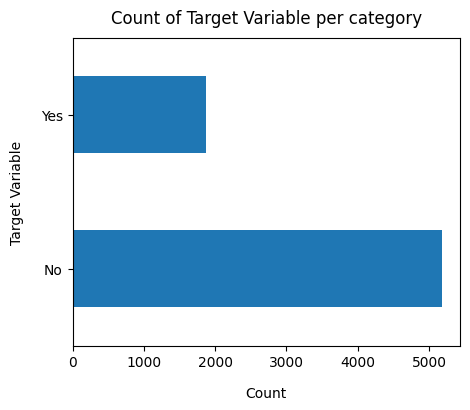

In [10]:
df["Churn"].value_counts().plot(kind="barh", figsize=(5,4))
plt.xlabel("Count", labelpad=12)
plt.ylabel("Target Variable", labelpad=12)
plt.title("Count of Target Variable per category", y=1.02)
plt.show()

- Data is highly imbalanced, ratio = 73:27
- So, we analyze the data with other features while taking the target values separately to get some insights. It means looking at the data by separating customers who left (churned) and those who stayed, then analyzing their other features to find the patterns or insights that explain why some customers leave.

In [11]:
# Concise summary of the dataframe, if we have too many columns, we will using the verbose = True mode
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


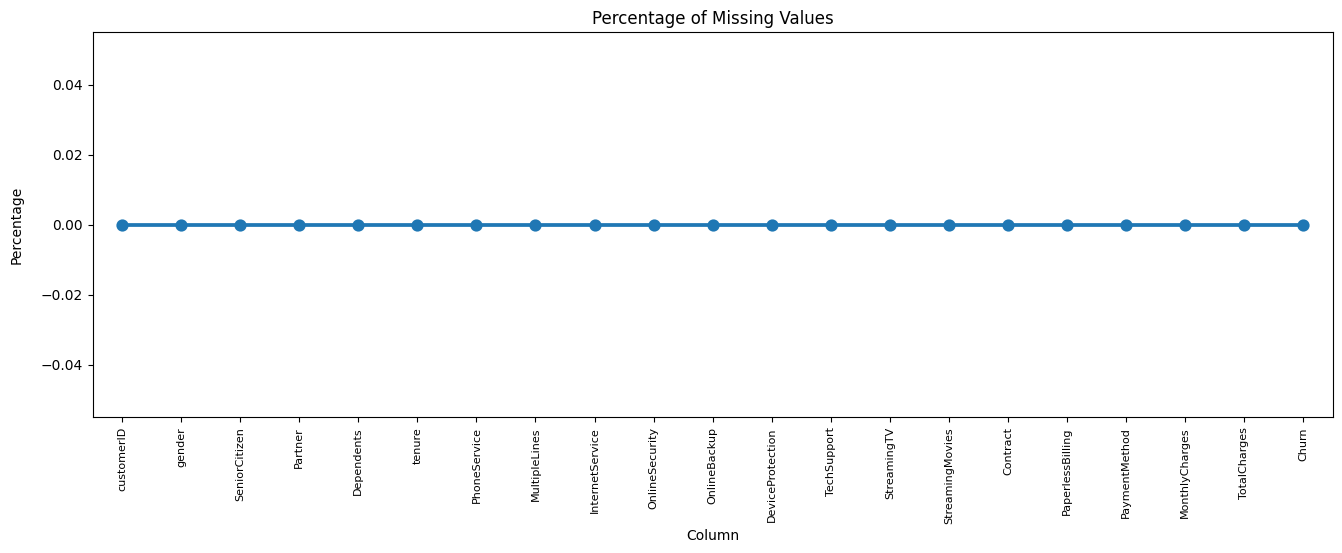

In [12]:
missing = pd.DataFrame((df.isnull().sum() / df.shape[0]) * 100).reset_index() 
missing.columns = ["Column", "Missing Value Percentage"]
plt.figure(figsize=(16,5))
sns.pointplot(x="Column",y="Missing Value Percentage", data=missing)
plt.xticks(rotation=90, fontsize=8)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage", labelpad=12)
plt.show()

### Missing Data - Initial Intution
- Here, we don't have any missing data.

General Thumb Rules:

- For feature with less missing values - can use regression to predict the missing value or fill with mean/median/mode of the value present, depending on the feature.
- For feature with very high number of missing values - it is better to drop those columns as they give very less insights on analysis.
- As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, is_car & car_type, People having no cars, will obviously have car_type as NaN (null), but that doesn't make this column useless, so decision has to be taken wisely.

# Data Cleaning

<b>1.</b> Create a copy of base data for manupulation & processing.

In [13]:
new_df = df.copy()

<b>2.</b> TotalCharges should be numeric amount. Let's convert it into numerical data type.

In [14]:
# Convert 'TotalCharges' to numeric values, coercing any non-numeric values to NaN
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors="coerce")

In [15]:
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<b>3.</b> As we can see there are 11 missing values in TotalCharges column. Let's check these records.

In [16]:
new_df[new_df["TotalCharges"].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<b>4. Missing Value Treatment</b>

Since the % of these records compared to the total dataset is very low i.e 0.15%, it is safe to ignore them from further processing.

In [17]:
# Removing missing values
new_df.dropna(how="any", inplace=True)

<b>5.</b> Divide customers into bins based on tenure e.g. Tenure < 12 months: assign a tenure group of 1-12, Tenure between 1 to 2 years : assign a tenure group of 13-24, Tenure between 2 to 3 years: assign a tenure group of 25-36 and so on...

In [18]:
# Get the max tenure
new_df["tenure"].max()

72

In [19]:
# Group the tenure in bins of 12 months.
bins = [i for i in range(1,80,12)]                        # [1, 13, 25, 37, 49, 61, 73]
labels = [f"{i} - {i+11}" for i in range(1,72,12)]          # ['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']

new_df["tenure_group"] = pd.cut(new_df.tenure, bins=bins, labels=labels, include_lowest=True, right=False)

In [20]:
new_df["tenure_group"].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

<b>6.</b> Drop column customerID and tenure   

In [21]:
new_df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

# Data Exploration

<b>Plot distribution of individual predictors by churn</b>

### Univariate Analysis

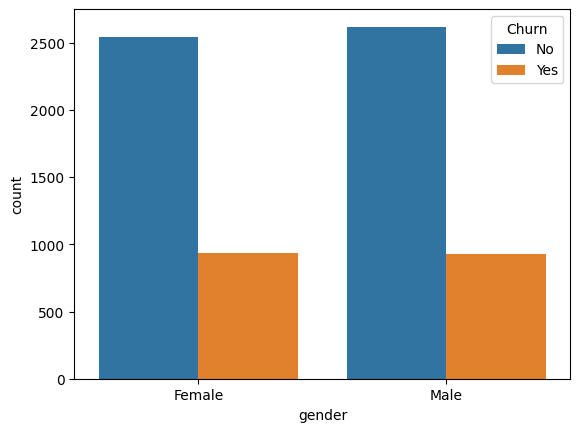

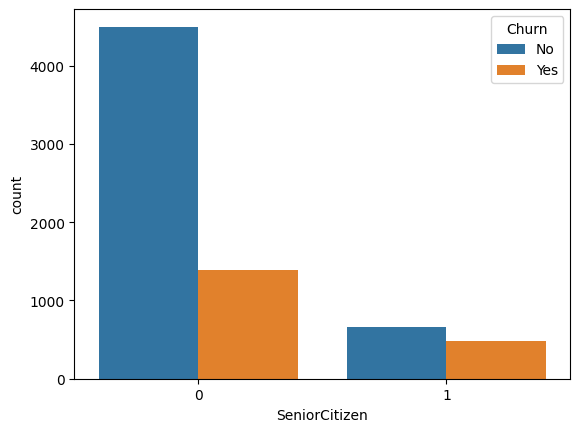

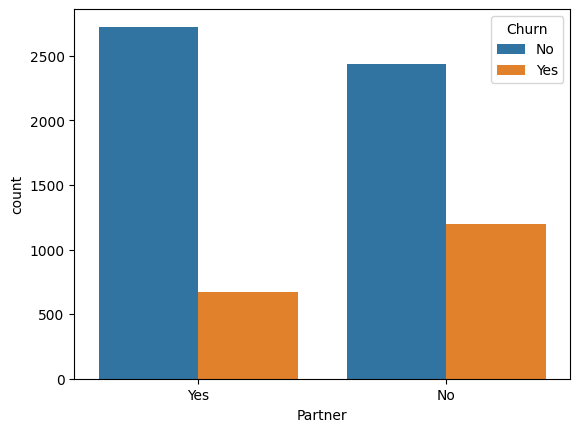

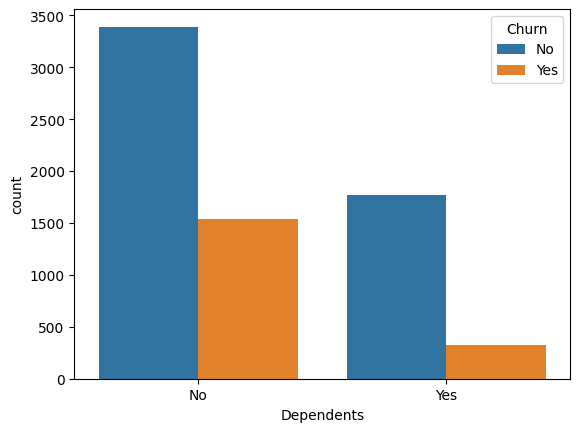

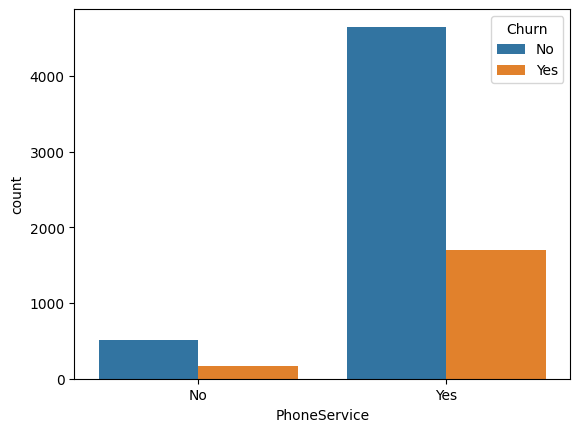

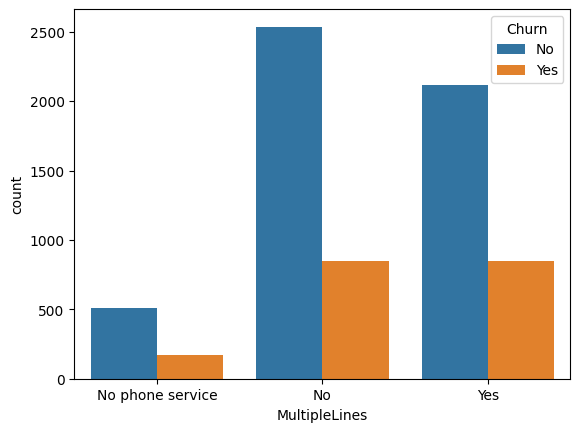

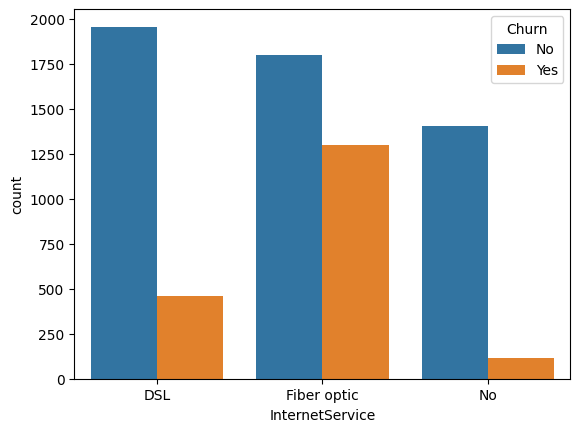

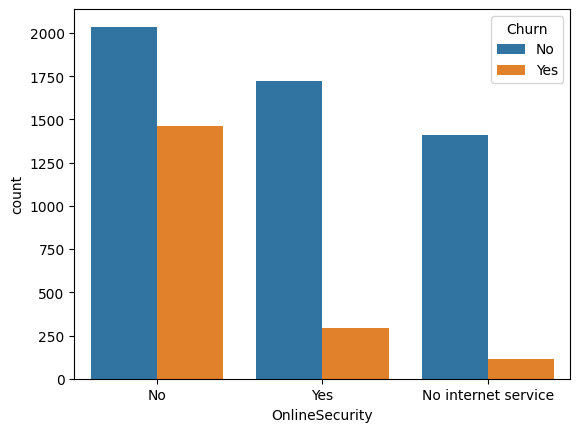

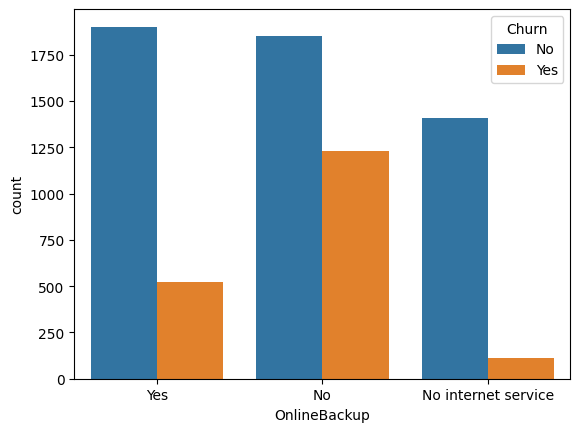

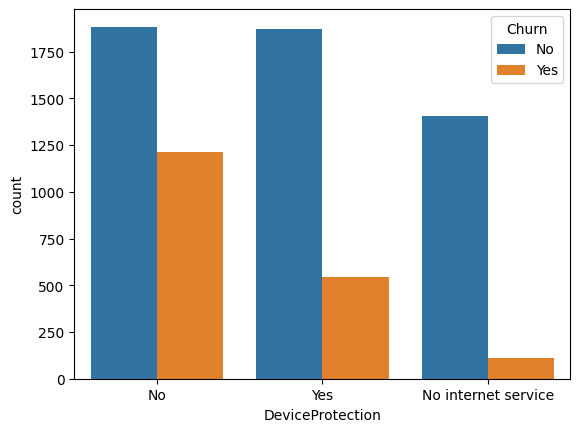

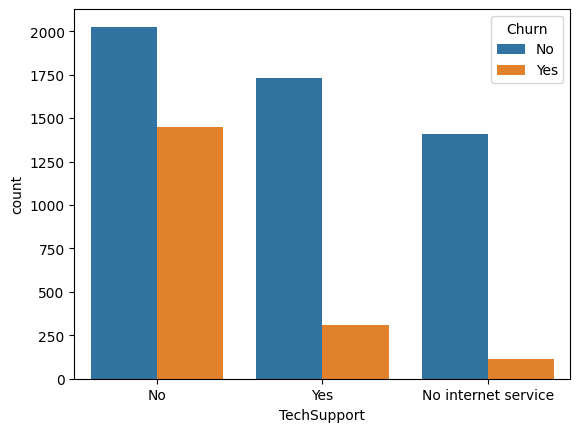

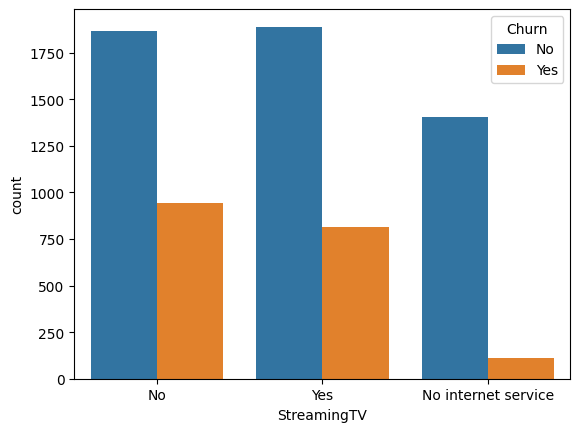

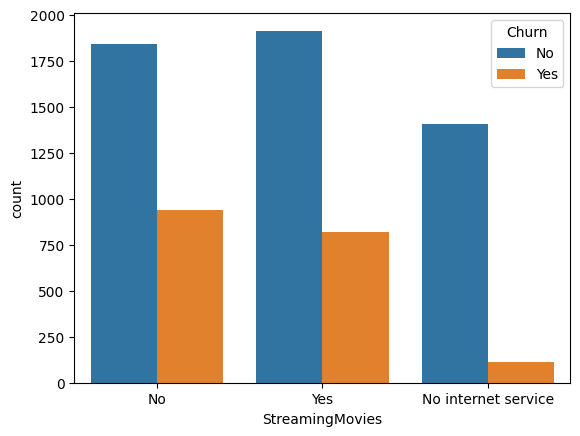

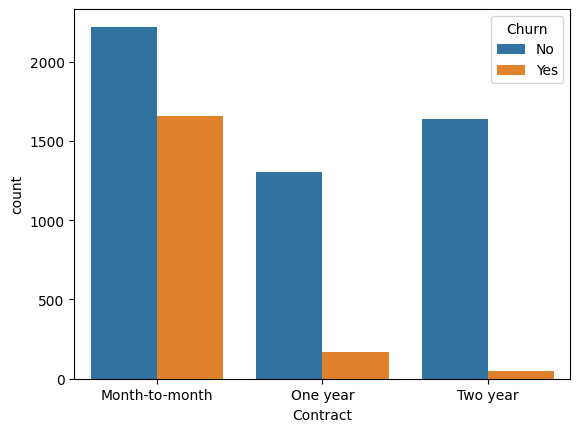

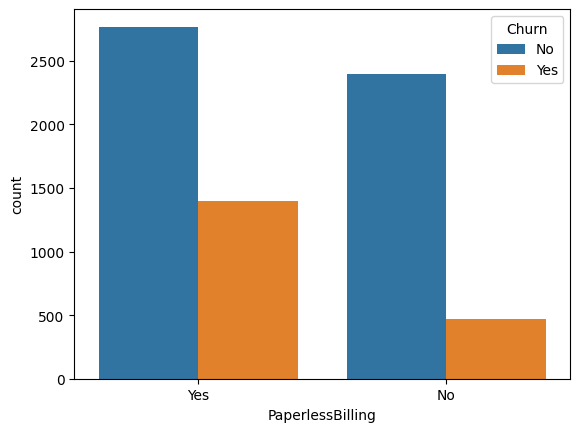

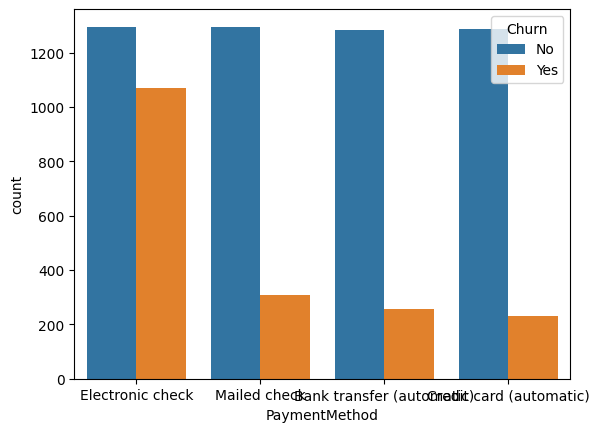

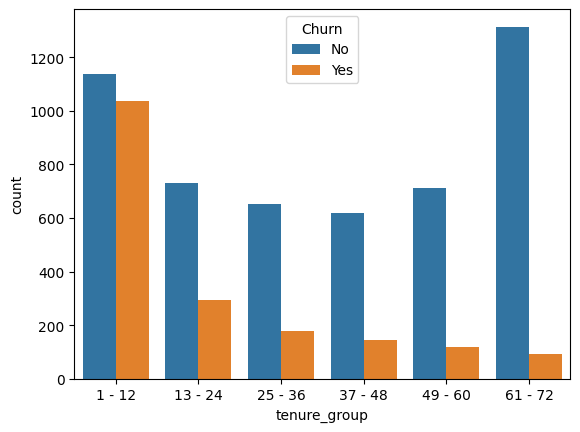

In [22]:
predictors = [col for col in new_df.columns if col not in ['Churn', 'TotalCharges', 'MonthlyCharges']]
for i, predictor in enumerate(predictors):
    plt.figure(i)
    sns.countplot(x=predictor, data=new_df, hue='Churn')

## Insights

1. <b>Gender</b> : Churn rates are evenly split between males (26%) and female (26%) customers, indicating gender alone does not significantly influence churn behaviour.

2. <b>SeniorCitizen</b>: Non-senior citizens (58.31% churn) have a higher churn rate compared to senior (23.60% churn).

3. <b>Partner and Dependents</b>: Customers without a partner (32.93% churn) or dependents (31.27% churn) churn more compared to those with a partner (19.66% churn) or dependents (15.45% churn).

4. <b>PhoneService</b>: Churn rates are similar for customers with (26.70%) or without (24.92%) phone service, indicating minimal impact on churn.

5. <b>InternetService</b>: Fibre optic users (41.89% churn) have higher churn rates than DSL users (18.95% churn).

6. <b>MultipleLines</b>: Customers with multiple lines (28.60% churn) have a slightly higher churn rate than those with single lines (25.04% churn).

7. <b>Contract Type</b>: Month-to-month contracts (42.70% churn) have higher churn rates compared to one-year (11.26%) or two-year contracts (2.83%).

8. <b>PaperLessBilling<b>: Customers with paperless bills (33.56% churn) have higher churn rates than those with paper bills (16.33%).

9. <b>PaymentMethod</b>: Customers using electronic checks (45.28% churn) have higher churn rates compared to mailed checks (19.10%), bank transfers (16.70%), or credit cards (15.24%).

10. <b>Additional Services</b>: Customers without additional services like online security, tech support, or streaming options tend to churn more.

### Numerical Analysis

In [23]:
new_df.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [24]:
new_df1_target0 = new_df[new_df["Churn"]=="No"]
new_df1_target1 = new_df[new_df["Churn"]=="Yes"]

In [25]:
new_df1_target1.gender.value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

In [26]:
pd.crosstab(new_df1_target1.PaymentMethod, new_df1_target1.Churn)

Churn,Yes
PaymentMethod,
Bank transfer (automatic),258
Credit card (automatic),232
Electronic check,1071
Mailed check,308


- Convert the target variable 'Churn' in a binary numeric variable i.e Yes=1, No=0

In [27]:
new_df["Churn"] = np.where(new_df.Churn == "Yes",1,0)

In [28]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


- Convert all the categorial variables into dummy variables

In [29]:
new_df_dummies = pd.get_dummies(new_df, dtype=int)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


<b>Relationship between Monthy Charges and Total Charges</b>

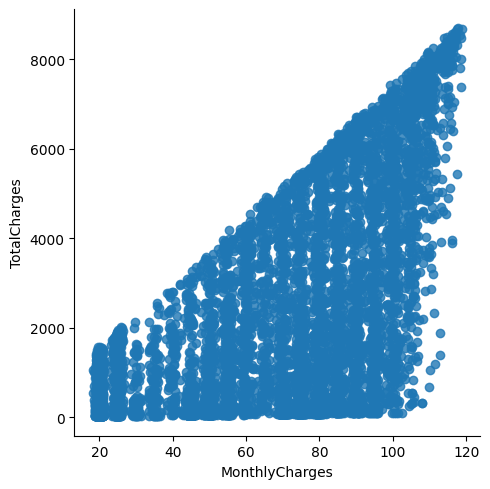

In [30]:
sns.lmplot(data=new_df_dummies, x="MonthlyCharges", y="TotalCharges", fit_reg=False)            
plt.show()

- MonthlyCharges and TotalCharges are postively correlated.

In [31]:
new_df_dummies["MonthlyCharges"].corr(new_df_dummies["TotalCharges"])

0.6510648032262024

- Total Charges increase as Monthly Charges increase - as expected.

<b>Churn by Monthly Charges and Total Charges</b>

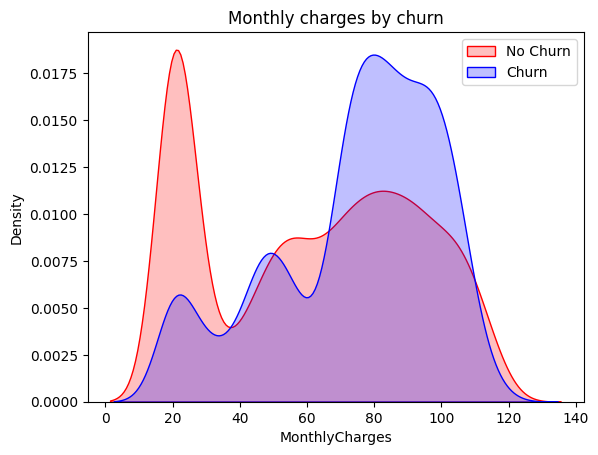

In [32]:
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"]==0)], color="Red", fill=True)

Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"]==1)], ax=Mth, color="Blue", fill=True)

Mth.legend(["No Churn", "Churn"], loc="upper right")
Mth.set_title("Monthly charges by churn")

plt.show()

<b>Insights:</b> Churn is high when Monthly Charges are high

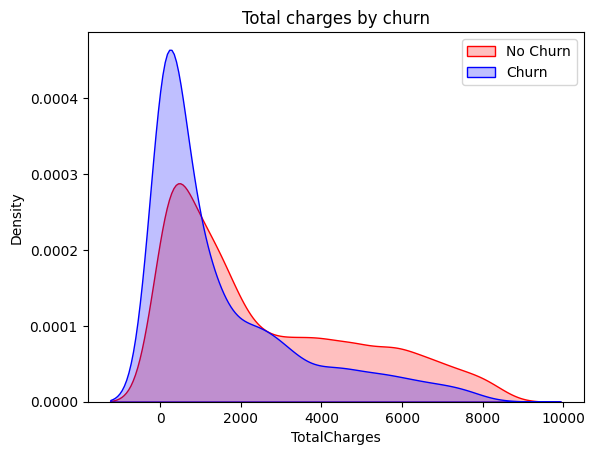

In [33]:
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"]==0)], color="Red", fill=True)

Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"]==1)], ax=Tot, color="Blue", fill=True)

Tot.legend(["No Churn", "Churn"], loc="upper right")
Tot.set_title("Total charges by churn")

plt.show()

In [34]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


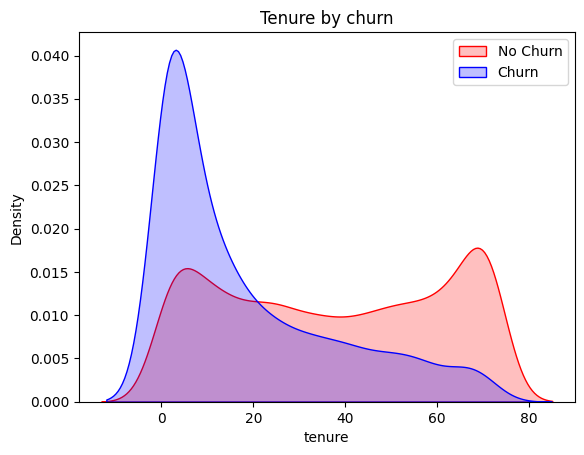

In [35]:
tur = sns.kdeplot(df.tenure[(df["Churn"]=="No")], color="Red", fill=True)

tur = sns.kdeplot(df.tenure[(df["Churn"]=="Yes")], ax=tur, color="Blue", fill=True)

tur.legend(["No Churn", "Churn"], loc="upper right")
tur.set_title("Tenure by churn")

plt.show()

<b>Surprising insight</b> as higher Churn at Total Charges

However if we combine the insights of 3 parameters i.e Tenure, Monthly Charges & Total Charges then the picture is bit clear: Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz <b>Higher Monthly Charge, Low tenure and Lower Total Charge</b> are linked to <b>High Churn</b>. 

<b>Build a correlation of all predictors with 'Churn'<b>

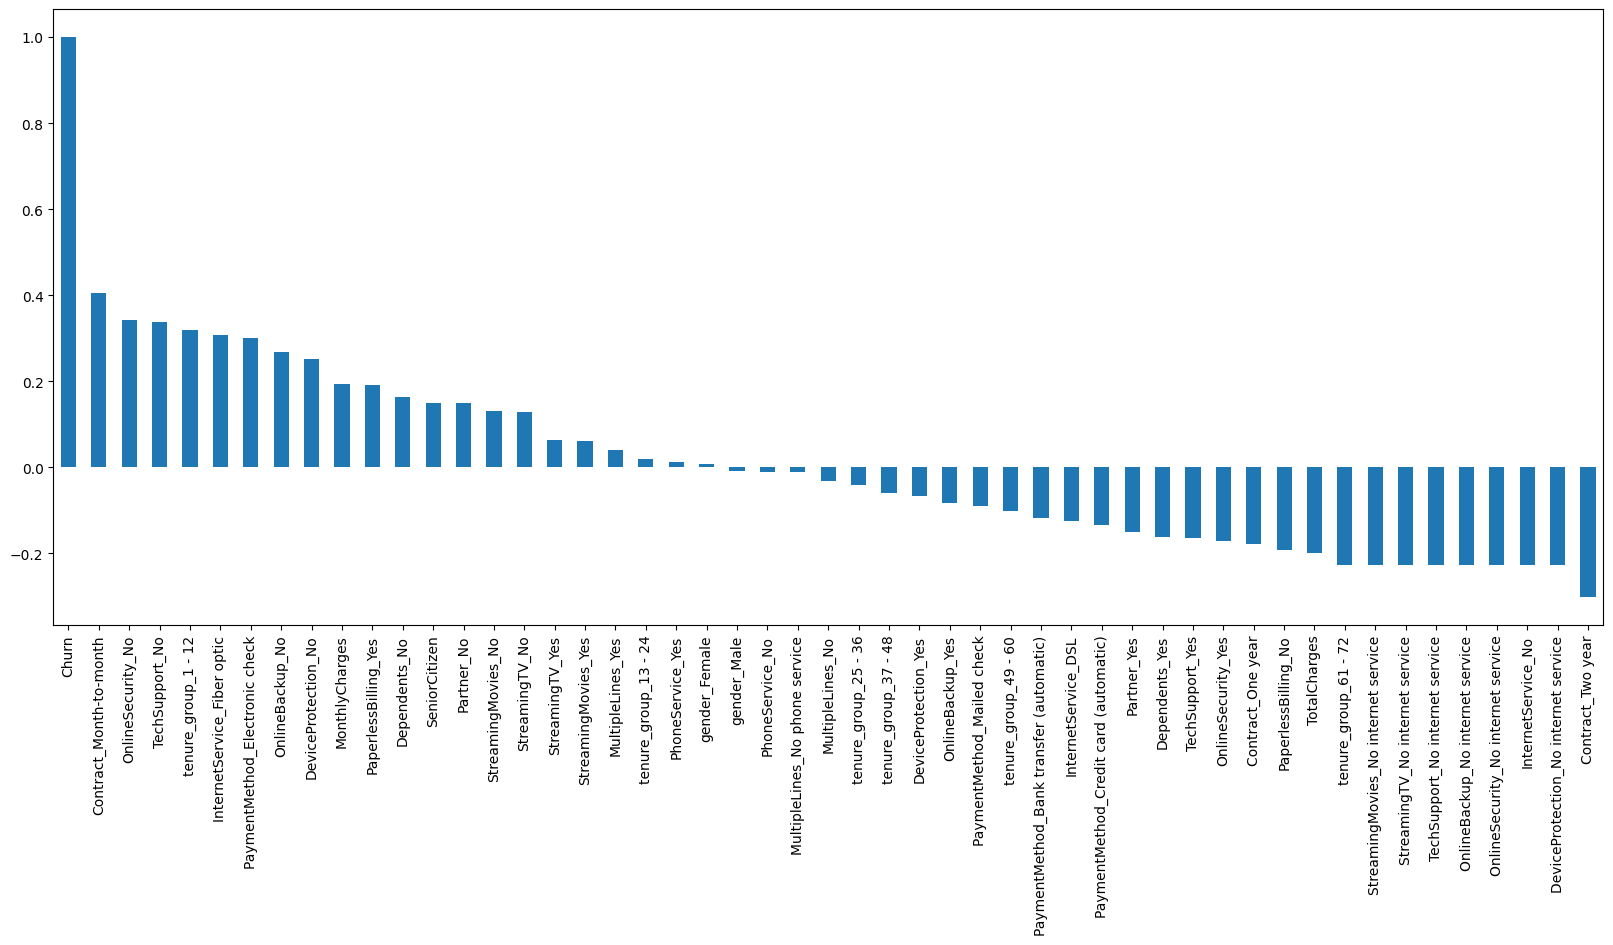

In [36]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.show()                                                                         # threshold value = 0.2

*Derived Insight:*

<b>High</b> Churn is seen in case of <b>Month to month contracts</b>, <b>No Tech support</b>, <b>First year of subscription</b>, <b>Payment via Electronic Check</b> and <b>Fibre Optics Internet</b>.

<b>Low</b> Churn is seen in case of <b>Long term contracts</b>, <b>Subscription without Internet service</b> and <b>The customers engaged for 5+ years</b>.

Factors like <b>Gender</b>, <b>Availability of PhoneService</b> and <b>number of Multiple lines</b> have almost <b>No</b> impact on Churn.

This is also evident from the <b>Heatmap</b> below.

<Axes: >

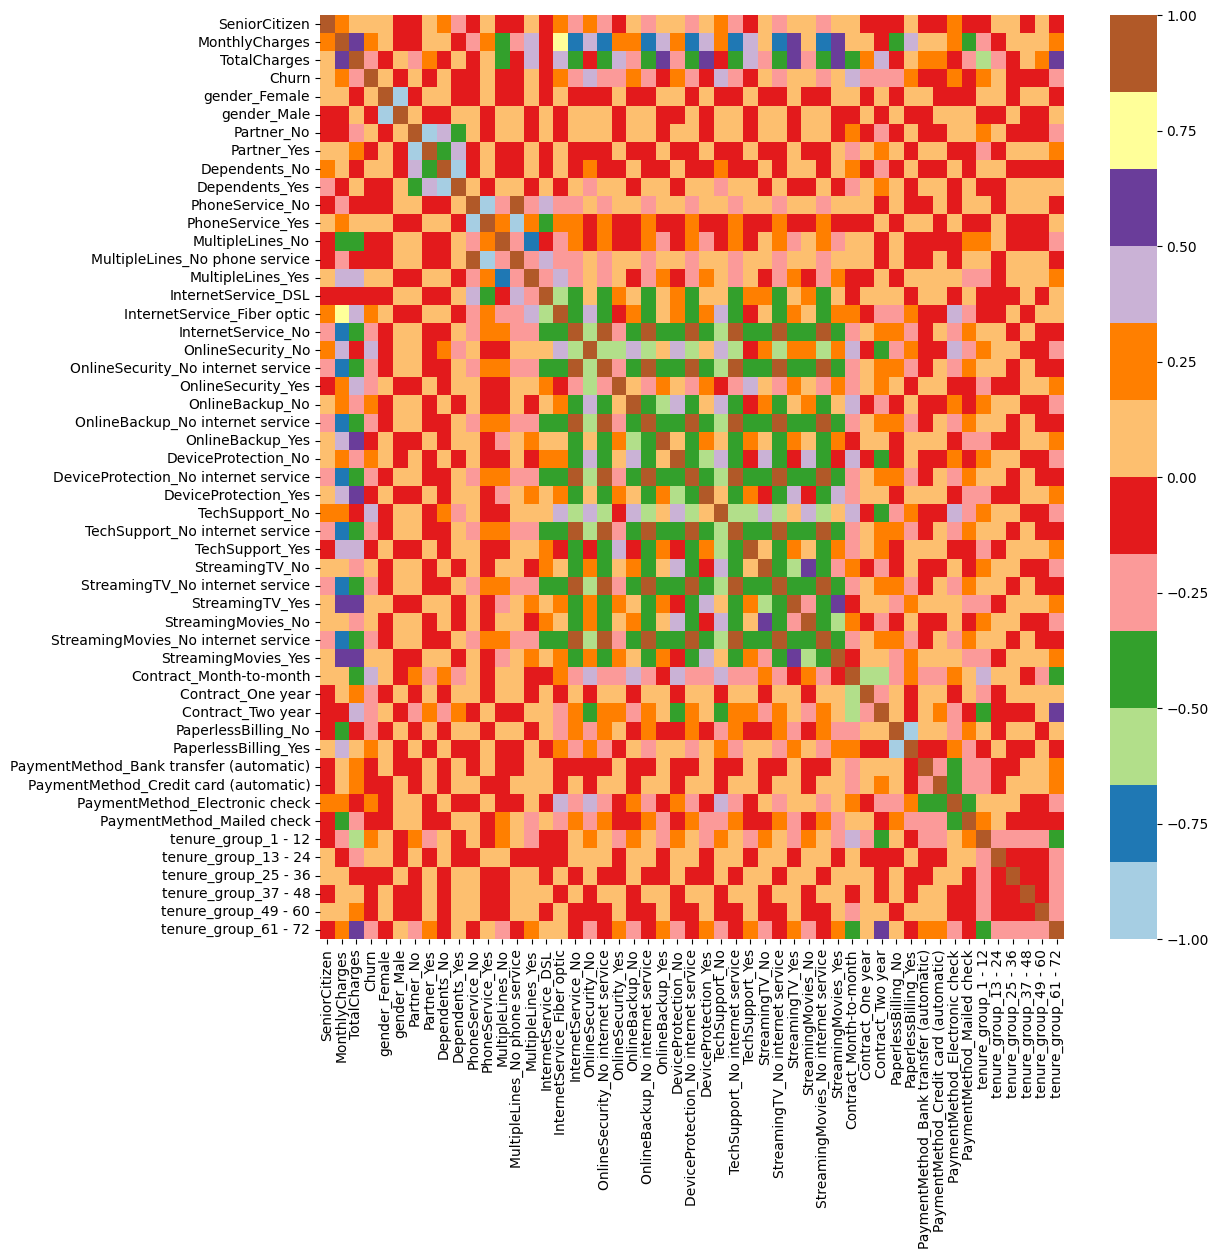

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(new_df_dummies.corr(), cmap="Paired")

### Bivariate Analysis

In [38]:
new_df1_target0= new_df.loc[new_df["Churn"]==0]
new_df1_target1= new_df.loc[new_df["Churn"]==1]

In [39]:
len(new_df1_target0)

5163

In [40]:
len(new_df1_target1)

1869

In [41]:
def uniplot(df,col,title,hue=None):
    plt.figure(figsize=(20,8))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue)
    plt.title(title)
    plt.yscale("log")

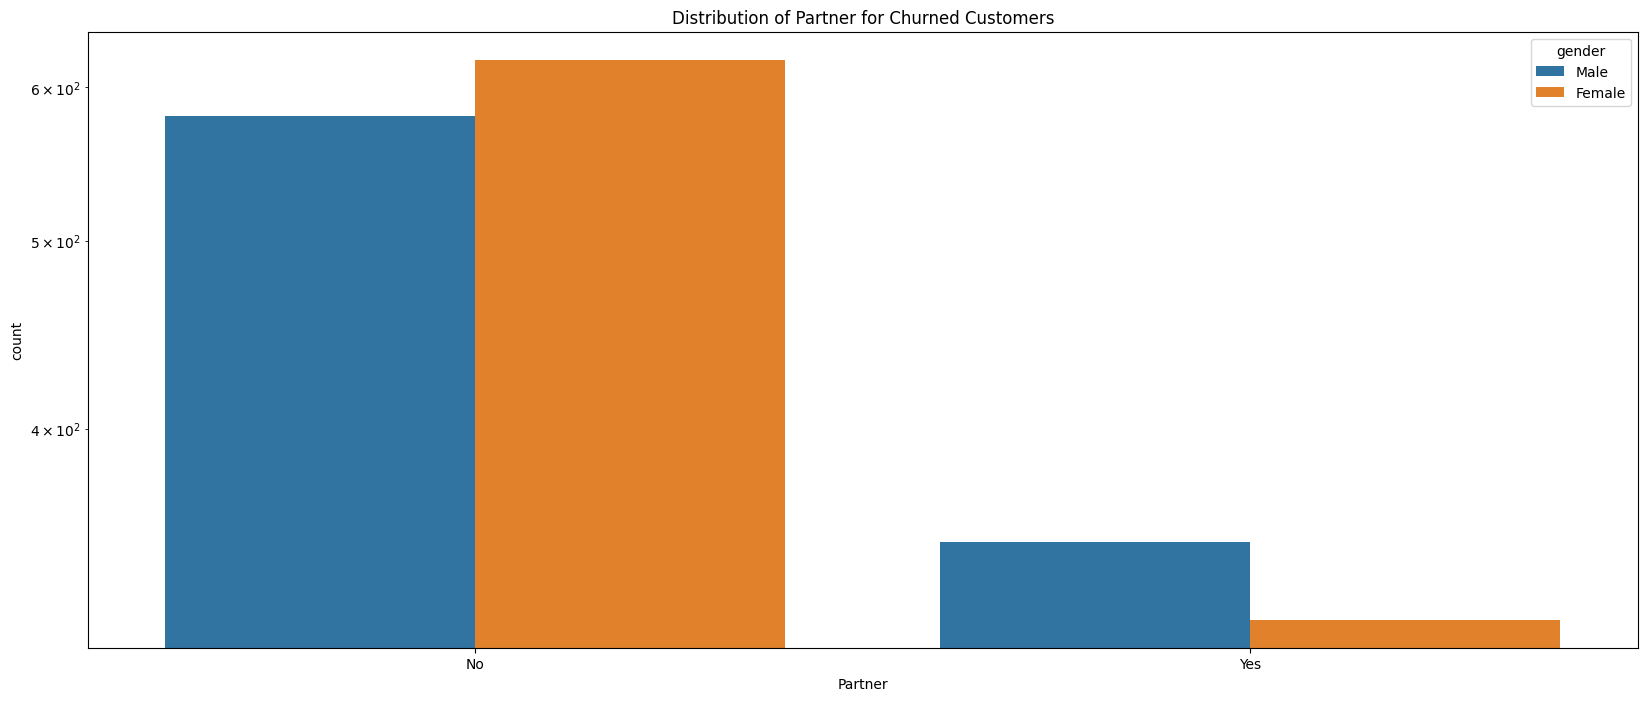

In [42]:
uniplot(new_df1_target1, col="Partner", title="Distribution of Partner for Churned Customers", hue="gender")

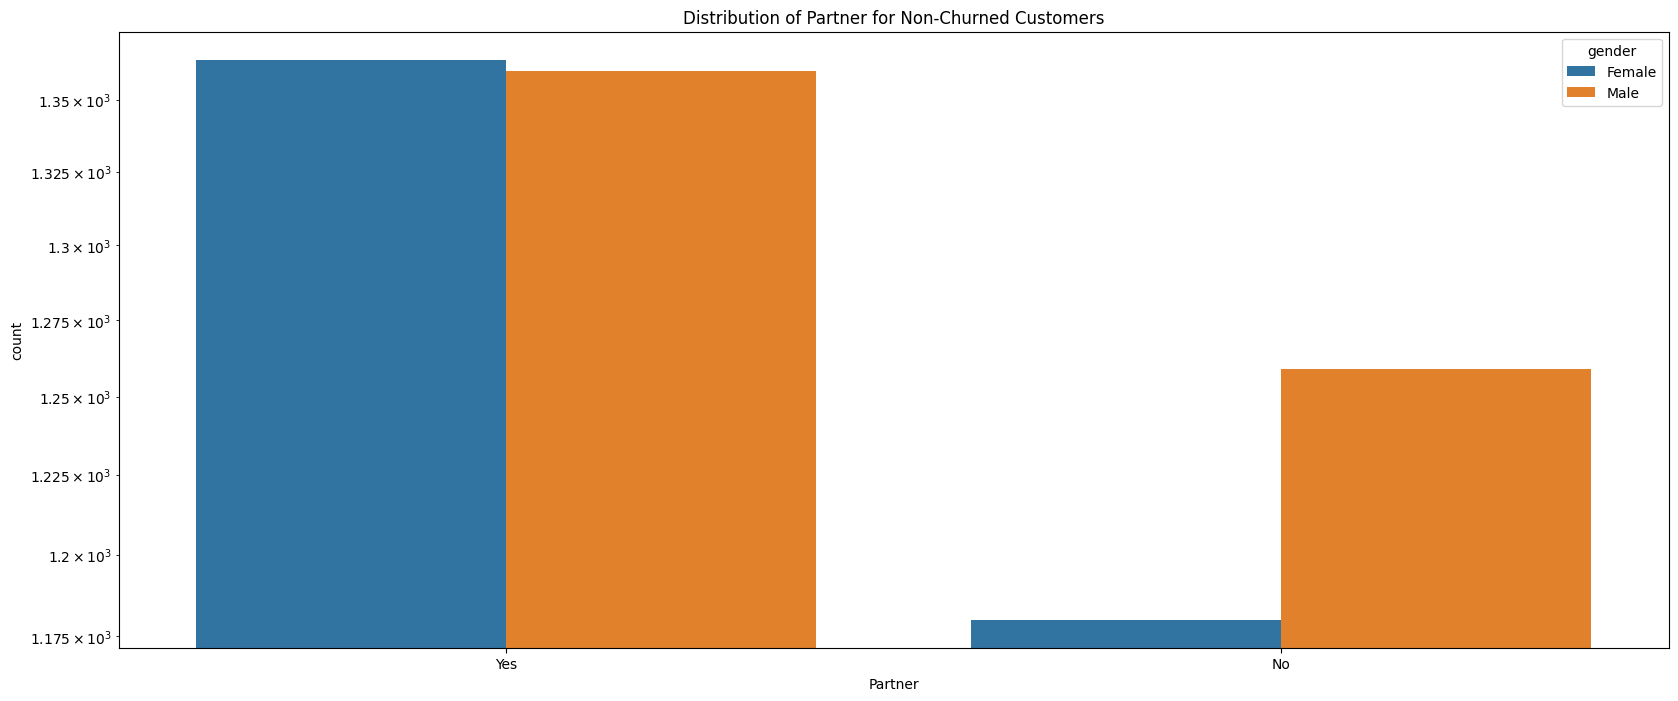

In [43]:
uniplot(new_df1_target0, col="Partner", title="Distribution of Partner for Non-Churned Customers", hue="gender")

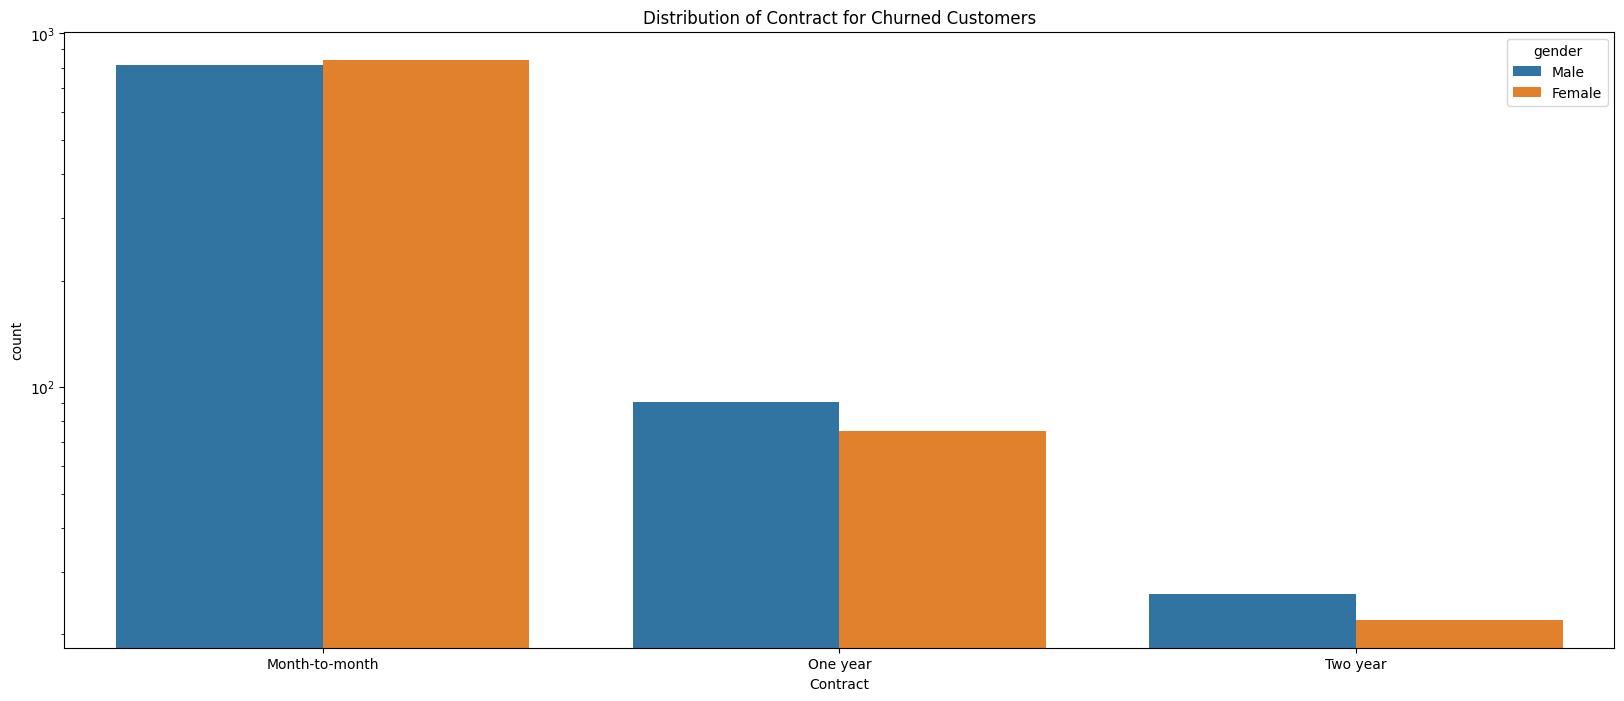

In [44]:
uniplot(new_df1_target1, col="Contract", title="Distribution of Contract for Churned Customers", hue="gender")

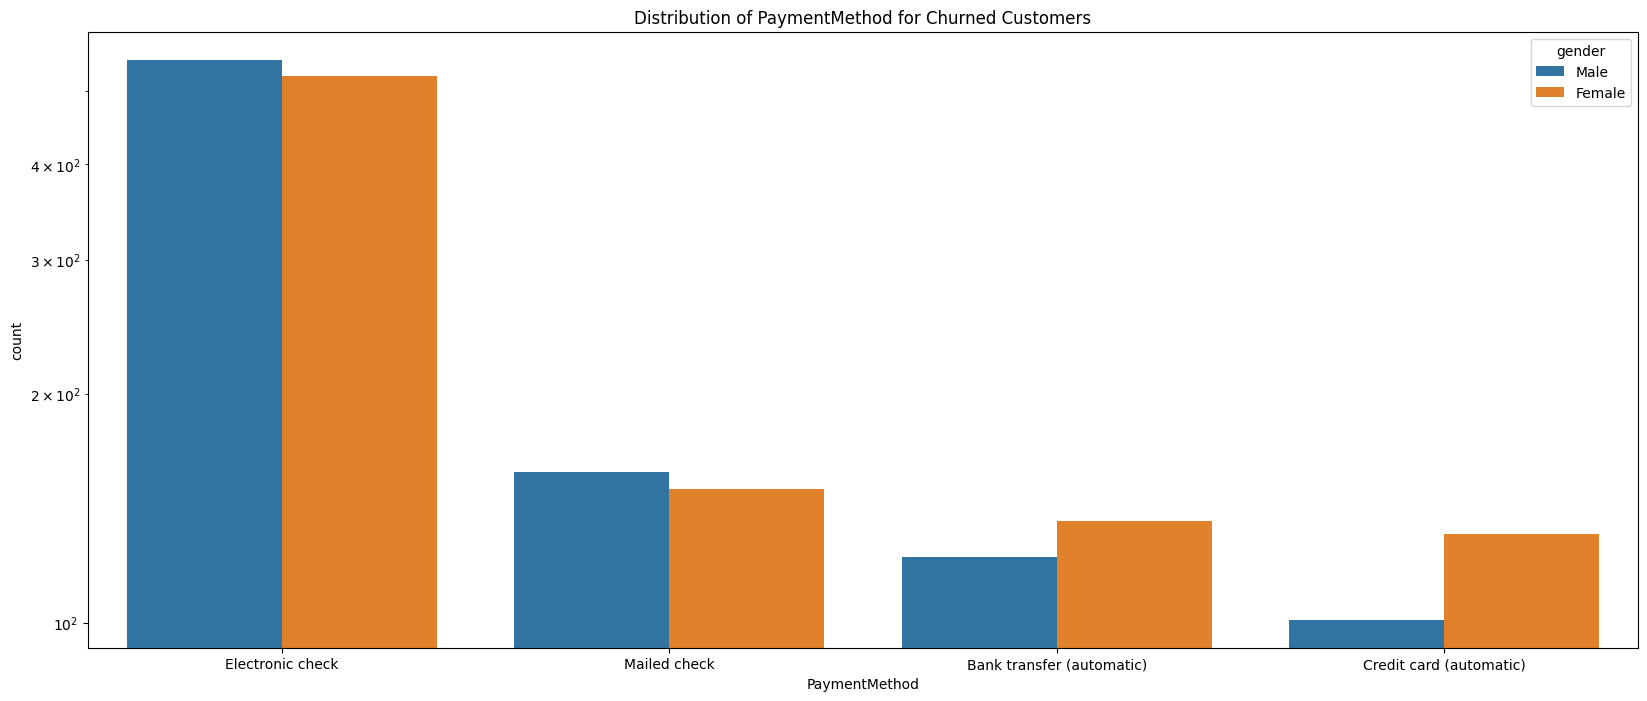

In [45]:
uniplot(new_df1_target1, col="PaymentMethod", title="Distribution of PaymentMethod for Churned Customers", 
        hue="gender")

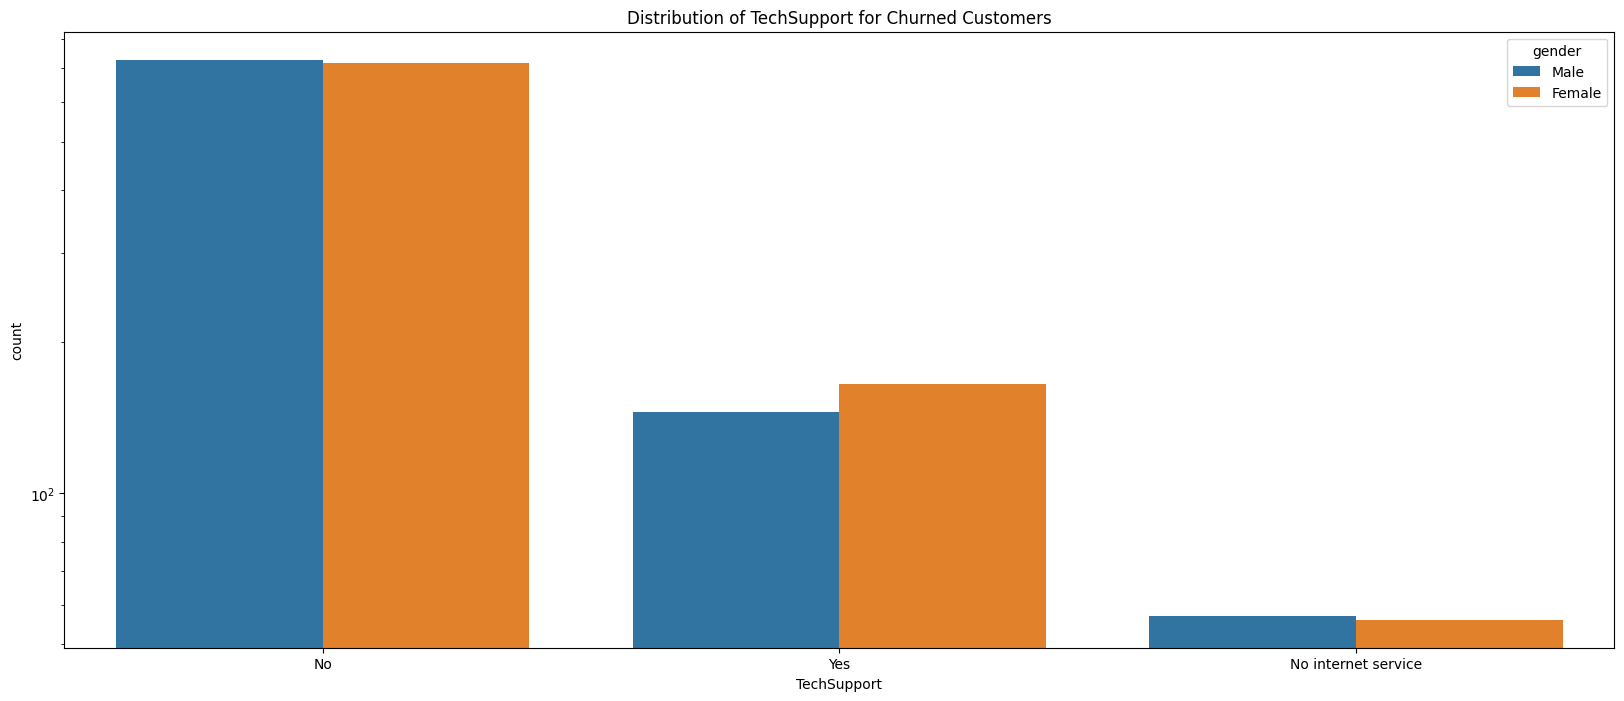

In [46]:
uniplot(new_df1_target1, col="TechSupport", title="Distribution of TechSupport for Churned Customers", hue="gender")

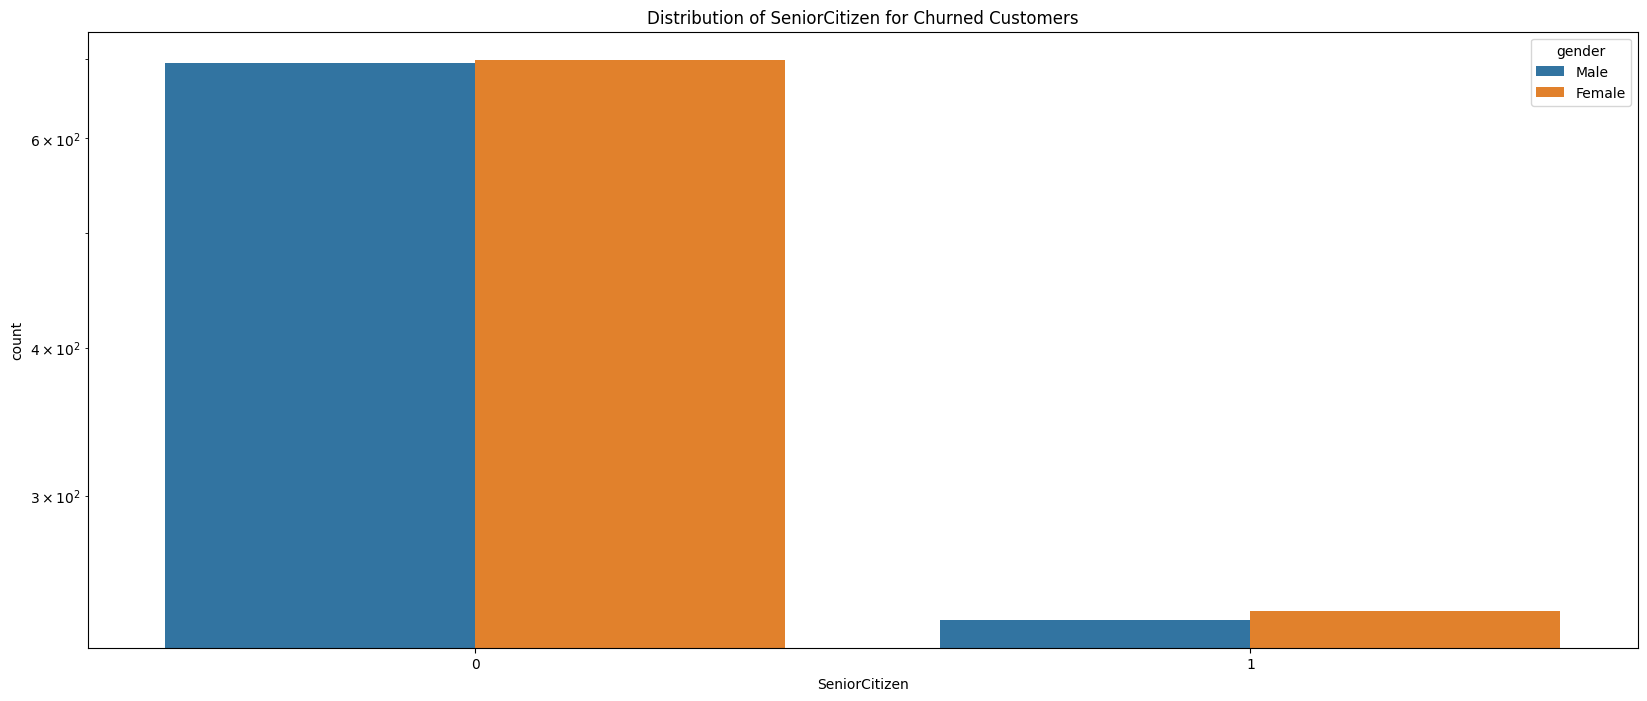

In [47]:
uniplot(new_df1_target1, col="SeniorCitizen", title="Distribution of SeniorCitizen for Churned Customers", 
        hue="gender")

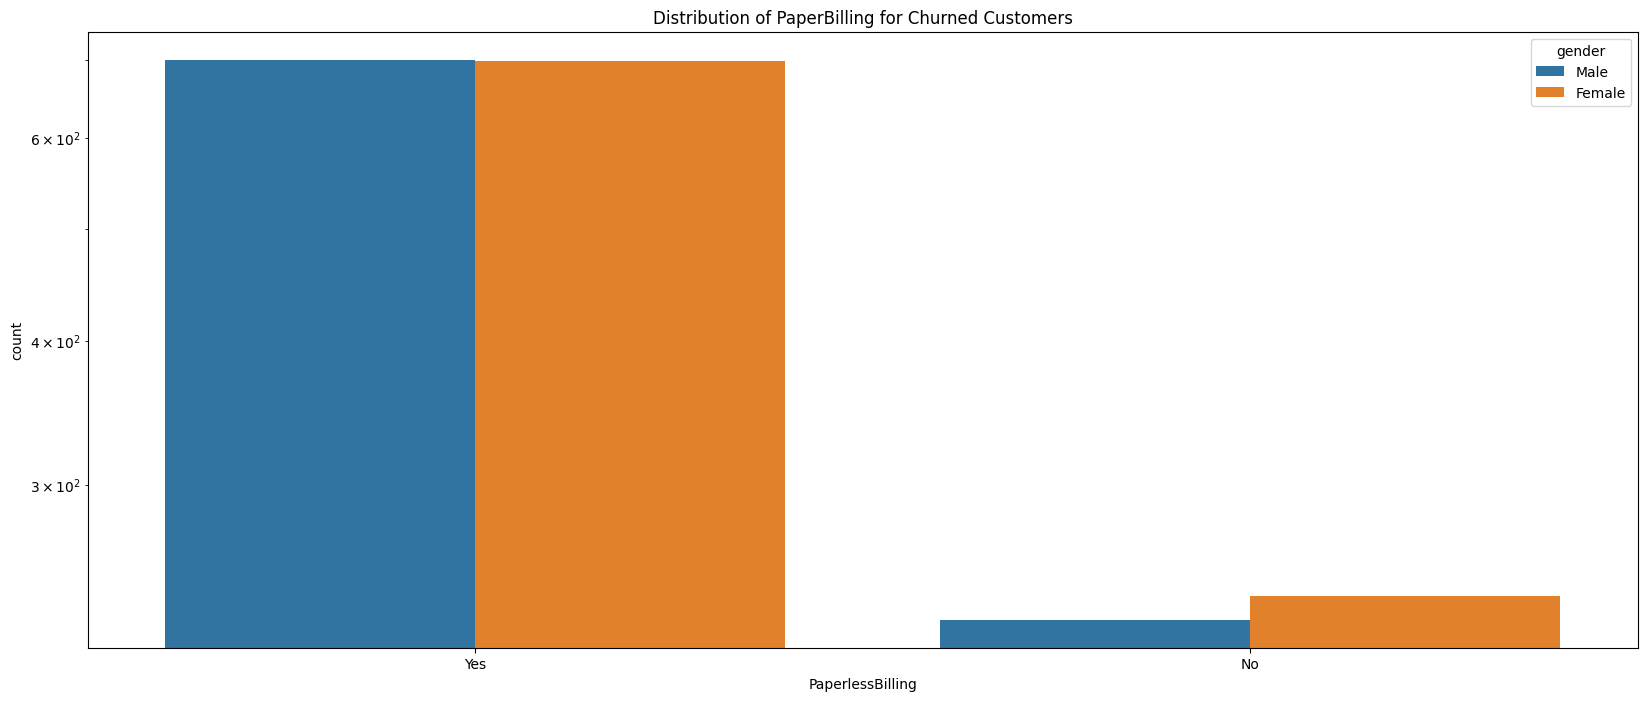

In [50]:
uniplot(new_df1_target1, col="PaperlessBilling", title="Distribution of PaperBilling for Churned Customers", 
        hue="gender")

# Conclusion

- Non-Senior Citizens are more likely to churn.

- People with no partners are more likely to churn; furthermore, single women are more likely to do so than single men.

- Contract Type - Monthy contracts are more likely to churn becuase of no contract terms, as they are free customers.

- Customers who pay via Electronic Check are more likely to churn. Additionally, female customers who pay via Credit Card are also more likely to churn.

- Customers with paperless bills have higher churn rates than those with paper bills. Additionally, females with paper bills churn more than males.

- MonthlyCharges and TotalCharges are postively correlated.

- Churn is high when Monthly Charges are high 

- Customers who don't have Online Security and Tech Support are high churners.

- People who are in the company between 1 to 12 months that means all the new customers are more  likely to churn.

- People who use internet service via fiber optics are more likely to churn.